In [153]:
#!pip install pandas seaborn sklearn matplotlib

#### Notebook follows the crisp approach
The **CR**oss **I**ndustry **S**tandard **P**rocess for **D**ata **M**ining (CRISP-DM) is a process model that serves as the base for a data science process. It has six sequential phases:

1. Business understanding – What does the business need?
2. Data understanding – What data do we have / need? Is it clean?
3. Data preparation – How do we organize the data for modeling?
4. Modeling – What modeling techniques should we apply?
5. Evaluation – Which model best meets the business objectives?
6. Deployment – How do stakeholders access the results?

# 1. Business understanding

### GOAL: predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly. 
### Columns:
- **PassengerId** - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
- **HomePlanet** - The planet the passenger departed from, typically their planet of permanent residence.
- **CryoSleep** - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
- **Cabin** - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
- **Destination** - The planet the passenger will be debarking to.
- **Age** - The age of the passenger.
- **VIP** - Whether the passenger has paid for special VIP service during the voyage.
- **RoomService, FoodCourt, ShoppingMall, Spa, VRDeck** - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
- **Name** - The first and last names of the passenger.
- **Transported** - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

In [308]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np
from pickle import dump, load
import math

from pandas.api.types import is_numeric_dtype  

# 2. Data understanding

In [155]:
df = pd.read_csv(os.path.join("data","raw","train.csv"))

In [156]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [157]:
df.shape

(8693, 14)

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [159]:
df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [160]:
def common_statistics(df, column):
    column_deep_dive = df[column_name]
    display(column_deep_dive.head())
    print("Unique values: {0}   (Total records: {1})".format(column_deep_dive.nunique(), df.shape[0]))
    print("Missing values: {0}".format(len(df[column_deep_dive.isnull()])))
    print("Missing values in %: {:.2f}".format(((len(df[column_deep_dive.isnull()])/df.shape[0])*100)))
    print("--------------------------------------")

### function version extened of numerical analysis is available later (to keep thinking path)

In [161]:
# Column "PassengerId"
column_name= "PassengerId"
column_deep_dive = df[column_name]
display(column_deep_dive.head())
print("Unique values: {0}   (Total records: {1})".format(column_deep_dive.nunique(), df.shape[0]))
print("Missing values: {0}".format(len(df[column_deep_dive.isnull()])))
print("Missing values in %: {:.2f}".format(((len(df[column_deep_dive.isnull()])/df.shape[0])*100)))
print("--------------------------------------")

0    0001_01
1    0002_01
2    0003_01
3    0003_02
4    0004_01
Name: PassengerId, dtype: object

Unique values: 8693   (Total records: 8693)
Missing values: 0
Missing values in %: 0.00
--------------------------------------


In [162]:
# Conclusion "PassengerId":
""" 
Data type: str
Every passenger has unique id
"""

' \nData type: str\nEvery passenger has unique id\n'

## [way of thinking] [custom function needed]
### As for all columns basic statistics will be needed creating a special function for that make a work easier

In [163]:
def common_statistics(df, column_name):
    column_deep_dive = df[column_name]
    display(column_deep_dive.head())
    print(f"Unique values: {column_deep_dive.nunique()}   (Total records: {df.shape[0]})")
    print(f"Missing values: {len(df[column_deep_dive.isnull()])}")
    print("Missing values in %: {:.2f}".format(((len(df[column_deep_dive.isnull()])/df.shape[0])*100)))
    print("--------------------------------------")

In [164]:
# Column "HomePlanet"
common_statistics(df,"HomePlanet")

0    Europa
1     Earth
2    Europa
3    Europa
4     Earth
Name: HomePlanet, dtype: object

Unique values: 3   (Total records: 8693)
Missing values: 201
Missing values in %: 2.31
--------------------------------------


[Text(0, 0, '2131'), Text(0, 0, '4602'), Text(0, 0, '1759')]

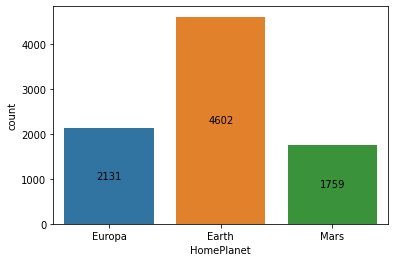

In [165]:
# Only 3 unique values - nice to plot
column_name='HomePlanet'
ax = sns.countplot(data =df, x=column_name)
ax.bar_label(ax.containers[0], label_type = 'center')

In [166]:
# Conclusion "Home Planet":
"""
Data type: str
There are 2% of missing values. To consider to fill these by dominant ("Earth HomePlanet") or put there a "Unknown".
Records are biased a little into "Earth HomePlanet"
"""

'\nData type: str\nThere are 2% of missing values. To consider to fill these by dominant ("Earth HomePlanet") or put there a "Unknown".\nRecords are biased a little into "Earth HomePlanet"\n'

In [167]:
# Column "CryoSleep"
common_statistics(df, "CryoSleep")


0    False
1    False
2    False
3    False
4    False
Name: CryoSleep, dtype: object

Unique values: 2   (Total records: 8693)
Missing values: 217
Missing values in %: 2.50
--------------------------------------


[Text(0, 0, '5439'), Text(0, 0, '3037')]

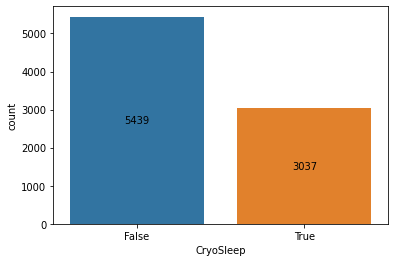

In [168]:
# plot distrubution
column_name='CryoSleep'
ax=sns.countplot(data =df, x=column_name)
ax.bar_label(ax.containers[0], label_type = 'center')

In [169]:
# Conclusion "CryoSleep"
"""
Data type: bool
Most of cabins are without option cryosleep
"""

'\nData type: bool\nMost of cabins are without option cryosleep\n'

## [way of thinking] [custom function needed]
#### As there were second time when  showing distribution plot was useful and probably there will be other oportunity for that to build the function

In [170]:
def plot_distribution(df, column_name):
    """
    Function for plotting a bar plot for distribution od categorical values. Be aware that to many categorical values may be not the best idea to show on graph.
    Arg:
    df - source data frame
    column_name - column under analysis
    """
    ax=sns.countplot(data =df, x=column_name)
    ax.bar_label(ax.containers[0], label_type = 'center')

In [171]:
# Column "Cabin"
common_statistics(df,'Cabin')

0    B/0/P
1    F/0/S
2    A/0/S
3    A/0/S
4    F/1/S
Name: Cabin, dtype: object

Unique values: 6560   (Total records: 8693)
Missing values: 199
Missing values in %: 2.29
--------------------------------------


In [172]:
# check what is the highest numer of passenger in single cabin
df.groupby('Cabin')['Cabin'].count().sort_values(ascending=False).head(15)

Cabin
G/734/S     8
C/21/P      7
G/1368/P    7
B/82/S      7
G/981/S     7
C/137/S     7
F/1411/P    7
G/1476/S    7
B/201/P     7
D/176/S     7
E/13/S      7
F/1194/P    7
B/11/S      7
G/109/P     7
G/974/P     6
Name: Cabin, dtype: int64

In [173]:
### passengers with roommate
8693 - 6560 - 199

1934

In [174]:
# Conclusion "Cabin"
"""
Data type: str
Column to divide into 3 separated! Reanalyse after that
1934 passengers share the cabin with someone
The highest number of passengers in one cabin is 8. Next number (7) is available on different decks.
"""

'\nData type: str\nColumn to divide into 3 separated! Reanalyse after that\n1934 passengers share the cabin with someone\nThe highest number of passengers in one cabin is 8. Next number (7) is available on different decks.\n'

In [175]:
# Column "Destination"
common_statistics(df, "Destination")

0    TRAPPIST-1e
1    TRAPPIST-1e
2    TRAPPIST-1e
3    TRAPPIST-1e
4    TRAPPIST-1e
Name: Destination, dtype: object

Unique values: 3   (Total records: 8693)
Missing values: 182
Missing values in %: 2.09
--------------------------------------


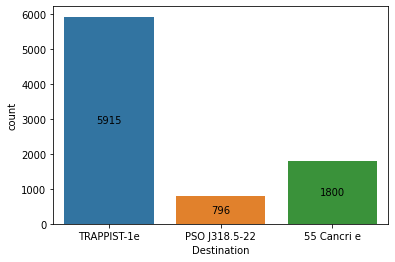

In [176]:
plot_distribution(df, "Destination")

In [177]:
# Conclusions "Destination"
"""
Data type : str
There are 3 available options
182 passengers don't declare destination
"""

"\nData type : str\nThere are 3 available options\n182 passengers don't declare destination\n"

In [178]:
# Column "Age"
common_statistics(df, "Age")

0    39.0
1    24.0
2    58.0
3    33.0
4    16.0
Name: Age, dtype: float64

Unique values: 80   (Total records: 8693)
Missing values: 179
Missing values in %: 2.06
--------------------------------------


In [179]:
print(f"Minimum age: {df['Age'].min()} \nMaximum age: {df['Age'].max()}) \nMean age: {df['Age'].mean()}\nMedian: {df['Age'].median()}")

Minimum age: 0.0 
Maximum age: 79.0) 
Mean age: 28.82793046746535
Median: 27.0


In [180]:
# Conclusion "Age"
"""
Data type: int
80 different ages
"""

'\nData type: int\n80 different ages\n'

## [way of thinking] [extend statistics function]
### Add additonal statistics for numerical values


In [181]:
def common_statistics(df, column_name):
    column_deep_dive = df[column_name]
    display(column_deep_dive.head())
    print(f"Unique values: {column_deep_dive.nunique()}   (Total records: {df.shape[0]})")
    print(f"Missing values: {len(df[column_deep_dive.isnull()])}")
    print("Missing values in %: {:.2f}".format(((len(df[column_deep_dive.isnull()])/df.shape[0])*100)))
    print("--------------------------------------")
    if is_numeric_dtype(column_deep_dive): 
        print(f"Minimum {column_name}: {df[column_name].min()}")
        print(f"Maximum {column_name}: {df[column_name].max()}")
        print(f"Mean {column_name}: {df[column_name].mean()}")
        print(f"Median {column_name}: {df[column_name].median()}")
        print("--------------------------------------")

In [182]:
# Column "VIP"
common_statistics(df,"VIP")

0    False
1    False
2     True
3    False
4    False
Name: VIP, dtype: object

Unique values: 2   (Total records: 8693)
Missing values: 203
Missing values in %: 2.34
--------------------------------------


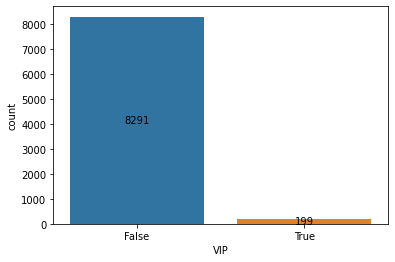

In [183]:
plot_distribution(df, "VIP")

In [184]:
# Conclusion
"""
Data type:  bool
The vast majority of passenger are not VIP
Check what VIP means: e.g. better accomodation, food etc.
"""

'\nData type:  bool\nThe vast majority of passenger are not VIP\nCheck what VIP means: e.g. better accomodation, food etc.\n'

In [185]:
# Column "RoomService"
common_statistics(df, "RoomService")

0      0.0
1    109.0
2     43.0
3      0.0
4    303.0
Name: RoomService, dtype: float64

Unique values: 1273   (Total records: 8693)
Missing values: 181
Missing values in %: 2.08
--------------------------------------
Minimum RoomService: 0.0
Maximum RoomService: 14327.0
Mean RoomService: 224.687617481203
Median RoomService: 0.0
--------------------------------------


<AxesSubplot:xlabel='RoomService', ylabel='Count'>

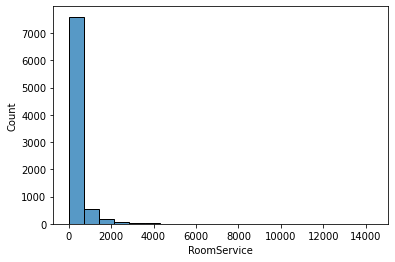

In [186]:
# check the roomservice cost distribution
sns.histplot(df["RoomService"], bins=20)

In [187]:
# check how many passengers spend 0
print(f'Passengers without roomservice: { df[df["RoomService"]==0].shape[0] }')
# check how many spend more that mean
print(f'Passengers spend more that 200 for roomservice : { df[df["RoomService"]>df["RoomService"].mean()].shape[0] }' )

Passengers without roomservice: 5577
Passengers spend more that 200 for roomservice : 1609


In [188]:
# Conclusions "RoomService"
"""
Data type: str
More that half of passengers do not have roomservice
"""

'\nData type: str\nMore that half of passengers do not have roomservice\n'

In [189]:
# Column "FoodCourt"
common_statistics(df, "FoodCourt")

0       0.0
1       9.0
2    3576.0
3    1283.0
4      70.0
Name: FoodCourt, dtype: float64

Unique values: 1507   (Total records: 8693)
Missing values: 183
Missing values in %: 2.11
--------------------------------------
Minimum FoodCourt: 0.0
Maximum FoodCourt: 29813.0
Mean FoodCourt: 458.07720329024676
Median FoodCourt: 0.0
--------------------------------------


# [way of thinking] [new function]
### as there are a few columns desribing additional services a few characteristics will be repeated

In [190]:
def additional_service_stats(df, column_name):
    # check the cost distribution
    sns.histplot(df[column_name], bins=20)
    # check how many passengers spend 0
    print(f'Passengers without {column_name}: { df[df[column_name]==0].shape[0] }')
    # check how many spend more that mean
    print(f'Passengers spend more that 200 for {column_name} : { df[df[column_name]>df[column_name].mean()].shape[0] }' )

Passengers without FoodCourt: 5456
Passengers spend more that 200 for FoodCourt : 1453


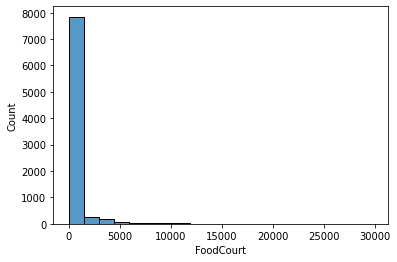

In [191]:
additional_service_stats(df,"FoodCourt")

In [192]:
# Conclusions "FoodCourt"

0      0.0
1     25.0
2      0.0
3    371.0
4    151.0
Name: ShoppingMall, dtype: float64

Unique values: 1115   (Total records: 8693)
Missing values: 208
Missing values in %: 2.39
--------------------------------------
Minimum ShoppingMall: 0.0
Maximum ShoppingMall: 23492.0
Mean ShoppingMall: 173.72916912197996
Median ShoppingMall: 0.0
--------------------------------------
Passengers without ShoppingMall: 5587
Passengers spend more that 200 for ShoppingMall : 1493


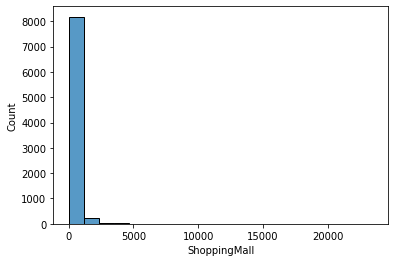

In [193]:
# Column "ShoppingMall"
common_statistics(df,"ShoppingMall")
additional_service_stats(df, "ShoppingMall")

In [194]:
# Conclusions "ShoppingMall"

0       0.0
1     549.0
2    6715.0
3    3329.0
4     565.0
Name: Spa, dtype: float64

Unique values: 1327   (Total records: 8693)
Missing values: 183
Missing values in %: 2.11
--------------------------------------
Minimum Spa: 0.0
Maximum Spa: 22408.0
Mean Spa: 311.1387779083431
Median Spa: 0.0
--------------------------------------
Passengers without Spa: 5324
Passengers spend more that 200 for Spa : 1425


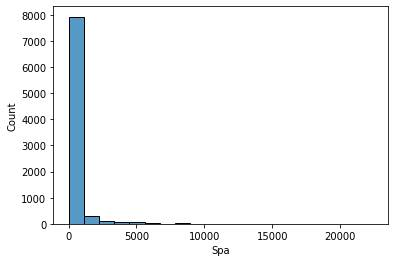

In [195]:
# Column "Spa"
common_statistics(df,"Spa")
additional_service_stats(df, "Spa")

In [196]:
# Conclusions "Spa"

0      0.0
1     44.0
2     49.0
3    193.0
4      2.0
Name: VRDeck, dtype: float64

Unique values: 1306   (Total records: 8693)
Missing values: 188
Missing values in %: 2.16
--------------------------------------
Minimum VRDeck: 0.0
Maximum VRDeck: 24133.0
Mean VRDeck: 304.8547912992357
Median VRDeck: 0.0
--------------------------------------
Passengers without VRDeck: 5495
Passengers spend more that 200 for VRDeck : 1450


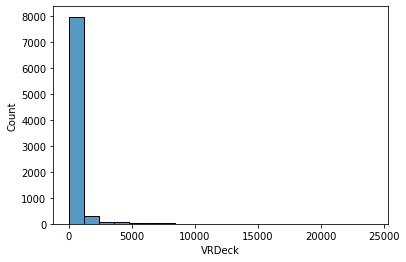

In [197]:
# Column "VRDeck"
common_statistics(df,"VRDeck")
additional_service_stats(df, "VRDeck")

In [198]:
# Conclusions "VRDeck"

In [199]:
# Column "Name"
common_statistics(df,"Name")

0      Maham Ofracculy
1         Juanna Vines
2        Altark Susent
3         Solam Susent
4    Willy Santantines
Name: Name, dtype: object

Unique values: 8473   (Total records: 8693)
Missing values: 200
Missing values in %: 2.30
--------------------------------------


In [200]:
# check passengers without Name
display(df[df["Name"].isnull()].head(10))
display(df[df["Name"].isnull()].tail(10))

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
27,0022_01,Mars,False,D/0/P,TRAPPIST-1e,21.0,False,980.0,2.0,69.0,0.0,0.0,NaN,False
58,0064_01,Mars,True,F/14/S,TRAPPIST-1e,15.0,False,0.0,0.0,0.0,0.0,0.0,NaN,True
65,0069_01,Earth,False,F/16/S,TRAPPIST-1e,42.0,False,887.0,0.0,9.0,6.0,0.0,NaN,True
77,0082_03,Mars,False,F/16/P,TRAPPIST-1e,8.0,False,0.0,0.0,0.0,0.0,0.0,NaN,True
101,0108_02,Earth,False,G/19/S,TRAPPIST-1e,31.0,False,562.0,0.0,326.0,0.0,0.0,NaN,False
126,0136_01,Earth,False,G/23/S,PSO J318.5-22,47.0,False,97.0,418.0,126.0,25.0,55.0,NaN,False
165,0190_01,Earth,True,G/32/S,55 Cancri e,11.0,False,0.0,0.0,0.0,0.0,0.0,NaN,False
297,0330_02,Europa,False,C/14/S,TRAPPIST-1e,32.0,False,247.0,4651.0,0.0,46.0,202.0,NaN,True
305,0337_03,Mars,False,F/63/S,55 Cancri e,0.0,False,0.0,0.0,0.0,0.0,0.0,NaN,True
331,0372_01,Earth,False,F/85/P,TRAPPIST-1e,24.0,False,0.0,5.0,0.0,2766.0,0.0,NaN,False


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8460,9034_04,Europa,False,D/288/P,TRAPPIST-1e,60.0,False,0.0,NaN,947.0,668.0,1.0,NaN,True
8510,9081_04,Earth,False,G/1476/P,TRAPPIST-1e,9.0,False,0.0,0.0,0.0,0.0,0.0,NaN,True
8516,9085_01,Europa,False,A/95/P,55 Cancri e,70.0,False,0.0,2113.0,0.0,1972.0,51.0,NaN,False
8604,9183_01,Europa,False,C/307/P,55 Cancri e,34.0,False,0.0,5.0,11.0,62.0,5804.0,NaN,False
8613,9194_01,NaN,False,E/603/S,55 Cancri e,53.0,False,0.0,4017.0,0.0,13.0,3147.0,NaN,False
8629,9205_02,Europa,True,B/300/P,TRAPPIST-1e,15.0,False,0.0,0.0,0.0,0.0,0.0,NaN,True
8631,9208_01,Earth,True,G/1485/S,TRAPPIST-1e,35.0,False,0.0,0.0,0.0,0.0,0.0,NaN,True
8636,9218_01,Europa,True,B/353/S,55 Cancri e,43.0,False,0.0,0.0,0.0,0.0,0.0,NaN,True
8652,9230_01,Europa,False,C/342/S,TRAPPIST-1e,36.0,True,0.0,5600.0,715.0,2868.0,971.0,NaN,True
8664,9246_01,Earth,NaN,G/1490/S,TRAPPIST-1e,32.0,False,0.0,0.0,0.0,0.0,0.0,NaN,True


In [201]:
# Conclusions "Name"

0    False
1     True
2    False
3    False
4     True
Name: Transported, dtype: bool

Unique values: 2   (Total records: 8693)
Missing values: 0
Missing values in %: 0.00
--------------------------------------
Minimum Transported: False
Maximum Transported: True
Mean Transported: 0.5036236051995858
Median Transported: 1.0
--------------------------------------


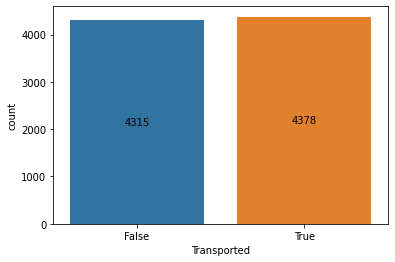

In [202]:
# Column "Transported"
common_statistics(df,"Transported")
plot_distribution(df,"Transported")

In [203]:
# Conclusions "Transported"
"""
Amount of records for both option is quite proportional. Don't need to resample
"""

"\nAmount of records for both option is quite proportional. Don't need to resample\n"

 ## Actions from conclusions
 - (*Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always*)
 - divide "Cabin" column into 3 separeted (*form deck/num/side, where side can be either P for Port or S for Starboard*); reanalyze them
 - check where and how VIPs are accomodated (eg. which deck, cryo, food etc.)

# [way of thinking] [next steps]
### now is good moment to implement points from "Actions from conclusions" and check the impact for being transported or not. It is first step for preprocessing but necessary to finish Explolatory Data Analysis

### new columns

In [204]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [205]:
# it is easy to create a few new column at the same time
df[["PassengerId_group","PassengerId_num_in_group"]] = pd.DataFrame(df["PassengerId"].str.split('_', expand=True), index=df.index).astype('int32')

In [206]:
# it is easy to create a few new column at the same time
df[["Cabin_deck","Cabin_num","Cabin_side"]] = pd.DataFrame(df["Cabin"].str.split('/', expand=True), index=df.index)
df['Cabin_num'] = df['Cabin_num'].fillna(-1).astype('int32')

### EDA for additional columns

In [207]:
common_statistics(df, "PassengerId_group")

0    1
1    2
2    3
3    3
4    4
Name: PassengerId_group, dtype: int32

Unique values: 6217   (Total records: 8693)
Missing values: 0
Missing values in %: 0.00
--------------------------------------
Minimum PassengerId_group: 1
Maximum PassengerId_group: 9280
Mean PassengerId_group: 4633.38962383527
Median PassengerId_group: 4630.0
--------------------------------------


In [208]:
# Conclusion

In [209]:
common_statistics(df,"PassengerId_num_in_group")

0    1
1    1
2    1
3    2
4    1
Name: PassengerId_num_in_group, dtype: int32

Unique values: 8   (Total records: 8693)
Missing values: 0
Missing values in %: 0.00
--------------------------------------
Minimum PassengerId_num_in_group: 1
Maximum PassengerId_num_in_group: 8
Mean PassengerId_num_in_group: 1.517772920740826
Median PassengerId_num_in_group: 1.0
--------------------------------------


In [210]:
# Conclusion


In [211]:
common_statistics(df,"Cabin_deck")

0    B
1    F
2    A
3    A
4    F
Name: Cabin_deck, dtype: object

Unique values: 8   (Total records: 8693)
Missing values: 199
Missing values in %: 2.29
--------------------------------------


In [212]:
common_statistics(df,"Cabin_num")

0    0
1    0
2    0
3    0
4    1
Name: Cabin_num, dtype: int32

Unique values: 1818   (Total records: 8693)
Missing values: 0
Missing values in %: 0.00
--------------------------------------
Minimum Cabin_num: -1
Maximum Cabin_num: 1894
Mean Cabin_num: 586.6011733578741
Median Cabin_num: 407.0
--------------------------------------


In [213]:
# Conclusion
# change into numeric

In [214]:
common_statistics(df,"Cabin_side")

0    P
1    S
2    S
3    S
4    S
Name: Cabin_side, dtype: object

Unique values: 2   (Total records: 8693)
Missing values: 199
Missing values in %: 2.29
--------------------------------------


## VIP vs additional services

<AxesSubplot:xlabel='Cabin_deck', ylabel='count'>

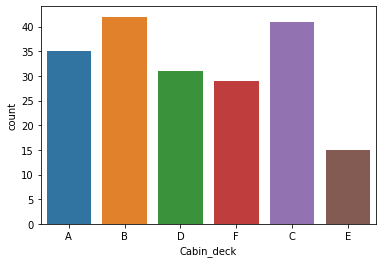

In [215]:
df_VIP = df[(df["VIP"]) & (~df["VIP"].isnull())]
sns.countplot(data=df_VIP, x="Cabin_deck")

# df["RoomService"]
# df["FoodCourt"]
# df["ShoppingMall"]
# df["Spa"]
# df["VRDeck"]

[Text(0, 0, '1811.39'),
 Text(0, 0, '473.615'),
 Text(0, 0, '247.727'),
 Text(0, 0, '760.711'),
 Text(0, 0, '1234.86')]

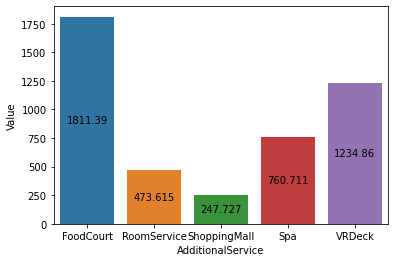

In [216]:
df_VIP_additional_service = df_VIP[["PassengerId","RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]].melt(id_vars=["PassengerId"]
                                                                                                            ,var_name="AdditionalService"
                                                                                                            ,value_name="Value")
                                                                                                            
ax = sns.barplot(data=df_VIP_additional_service.groupby("AdditionalService").mean().reset_index(), x="AdditionalService",y="Value")
ax.bar_label(ax.containers[0], label_type="center")
#x = sns.barplot(x="AdditionalService", y="Value", data=df_VIP_additional_service, estimator=sum)

In [217]:
for col in ["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]:
    percentage = (df_VIP_additional_service[(df_VIP_additional_service["AdditionalService"]==col) & (df_VIP_additional_service["Value"]==0)].shape[0])/(df_VIP_additional_service.shape[0])*100
    print(f'Passengers without {col}: {percentage} %')

Passengers without RoomService: 9.949748743718594 %
Passengers without FoodCourt: 6.733668341708543 %
Passengers without ShoppingMall: 10.854271356783919 %
Passengers without Spa: 7.63819095477387 %
Passengers without VRDeck: 7.738693467336684 %


# 3. Data preparation

### Keep column list during EDA at the end of notebook to easy grab next one for analysis
### Columns:
PassengerId      object  
HomePlanet       object  
CryoSleep        object  
Cabin            object  
Destination      object  
Age             float64  
VIP              object  
RoomService     float64  
FoodCourt       float64  
ShoppingMall    float64  
Spa             float64  
VRDeck          float64  
Name             object  
Transported        bool  

### Steps:
1. Move classification column (Transported) at the beggining
2. Prepare columns:
- deal with Nans
- change types into numeric for: Passenger_group, Passenger_num_in_group, Cabin_num
- categorical\boolean values into numerical

### Move classification column

In [218]:
label_column = df.pop('Transported')

In [219]:
df.insert(0,"Transported", label_column)

### Deal with Nans

#### check the impact of removing all NaNs

In [220]:
# NANs
print(df.dropna().shape[0])
print((df.dropna().shape[0]/df.shape[0])*100)

6606
75.99217761417232


## [conclusion]
#### 75% of data are available after removing nans - not so bad so as first dataframe for preprocessing remove all rows with missing values

In [307]:
df_train_removed_nans = df.dropna()

## [conclusion]
### but lets prepare a few more dataframes where nans will be filled to check later the impact of that for modelling

In [316]:
drop_half_nans = df.dropna(thresh=math.ceil(len(df.columns)/2)).shape[0]
print("how many rows have more then half of features are NaNs: {}".format((drop_half_nans/df.shape[0])*100))

drop_quarter_nans = df.dropna(thresh=math.ceil(len(df.columns)*3/4)).shape[0]
print("how many rows have more then quarter of features are NaNs: {}".format((drop_quarter_nans/df.shape[0])*100))

how many rows have more then half of features are NaNs: 100.0
how many rows have more then half of features are NaNs: 99.94248245714942


#### 99% of reord have filled rows in more than 75% so there is potential to handle with nans

# [TO_DO]
missing value imputation

# [way of thinking] create lists of columns with the same type to potentially work with them togheter

In [222]:
boolean_columns = ['CryoSleep','VIP']
numeric_columns_for_scaling = [ 'RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
categorical_columns = ['HomePlanet', 'Destination','Cabin_deck','Cabin_side']
numeric_columns = ['Age','Cabin_num','PassengerId_group','PassengerId_num_in_group']
rest_columns = ['Name'] # in case to be useful
columns_to_remove = ['Cabin', 'PassengerId'] # columns were splited into detail; no more needed

categorical columns:  
HomePlanet - 3 values  
CryoSleep          true/false  
Passenger_group  
Passenger_num_in_group  
Cabin_deck  - 8 values
Cabin_side - 2 values  
Destination - 3 values  
VIP                true/false  




In [223]:
# categorical features
# pandas approach
# get_dummies
# factorize for cat. more than 2
# map for boolean
# use pipe for whole process 

In [224]:
def copy_df(df):
    return df.copy()

def categories_into_numbers(df, column_names: list = None):
    if not isinstance(column_names, list):
        df[column_names] = pd.factorize(df[column_names])[0]
    else:
        for col_name in column_names:
            df[col_name] = pd.factorize(df[col_name])[0]

    return df 

def booleans_into_numbers(df, column_names: list = None):
    boolean_dict = {False:0, True: 1}

    if not isinstance(column_names, list):
        df[column_names] = df[column_names].map(boolean_dict)
    else:
        for col_name in column_names:
            df[col_name] = df[col_name].map(boolean_dict)

    return df 
    

# easy to implement other standarization or normalization methods
def numeric_scaling_minmax(df, column_names: list = None, feature_range=(0, 1)):
    min_range = feature_range[0]
    max_range = feature_range[1]

    if not isinstance(column_names, list):
        col_std = (df[column_names] - df[column_names].min()) / (df[column_names].max() - df[column_names].min())
        df[column_names] = col_std * (max_range - min_range) + min_range
    else:
        for col_name in column_names:
            col_std = (df[col_name] - df[col_name].min()) / (df[col_name].max() - df[col_name].min())
            df[col_name] = col_std * (max_range - min_range) + min_range

    return df 

def remove_columns(df, column_names: list = None):
    return df.drop(column_names, axis=1)


   

In [225]:
df_preproc_pandas = (df_train_removed_nans.pipe(copy_df)
                    .pipe(categories_into_numbers, column_names = categorical_columns)
                    .pipe(booleans_into_numbers, column_names= boolean_columns)
                    .pipe(numeric_scaling_minmax, column_names = numeric_columns_for_scaling)
                    .pipe(remove_columns, column_names= columns_to_remove)
                    .pipe(remove_columns, column_names= rest_columns)
                    )
#df_preproc_pandas.drop(columns_to_remove, axis=1, inplace=True)
df_preproc_pandas.head()

,Transported,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,PassengerId_group,PassengerId_num_in_group,Cabin_deck,Cabin_num,Cabin_side
0,False,0,0,0,39.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,1,1,0,0,0
1,True,1,0,0,24.0,0,0.010988,0.000302,0.002040,0.024500,0.002164,2,1,1,0,1
2,False,0,0,0,58.0,1,0.004335,0.119948,0.000000,0.299670,0.002410,3,1,2,0,1
3,False,0,0,0,33.0,0,0.000000,0.043035,0.030278,0.148563,0.009491,3,2,2,0,1
4,True,1,0,0,16.0,0,0.030544,0.002348,0.012324,0.025214,0.000098,4,1,1,1,1


In [226]:
# categorical features
# sklearn approach
## one-hot encoder, labelEncoder
# make_column_transformer

In [227]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import make_column_transformer

# [thinking path] create custom transformers 

In [228]:
df_preproc_sklearn = df_train_removed_nans.copy()

df_preproc_sklearn.drop(columns_to_remove, axis=1, inplace=True)
df_preproc_sklearn.drop(rest_columns, axis=1, inplace=True)
labels = df_preproc_sklearn['Transported'].values
df_preproc_sklearn.drop(columns="Transported", axis=1, inplace=True)

transformer = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), categorical_columns ) # defining handle_unknow is needed for test dataset, where is possibily to get new unseen in train set value
    ,(OneHotEncoder(), boolean_columns)
    ,(MinMaxScaler(), numeric_columns_for_scaling)
    ,remainder='passthrough')

data_transformer = transformer.fit(df_preproc_sklearn)
preproc_sklearn = data_transformer.transform(df_preproc_sklearn)


In [229]:
## add classification column to narray
preproc_sklearn = np.c_[labels,preproc_sklearn]

In [304]:
df_preproc_sklearn.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,PassengerId_group,PassengerId_num_in_group,Cabin_deck,Cabin_num,Cabin_side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,1,1,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,2,1,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,3,1,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,3,2,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,4,1,F,1,S


In [303]:
preproc_sklearn[1,]

array([1.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
       0.00000000e+00, 1.09879032e-02, 3.01881729e-04, 2.04031666e-03,
       2.45001785e-02, 2.16365067e-03, 2.40000000e+01, 2.00000000e+00,
       1.00000000e+00, 0.00000000e+00])

In [231]:
data_transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder-1',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['HomePlanet', 'Destination', 'Cabin_deck',
                                  'Cabin_side']),
                                ('onehotencoder-2', OneHotEncoder(),
                                 ['CryoSleep', 'VIP']),
                                ('minmaxscaler', MinMaxScaler(),
                                 ['RoomService', 'FoodCourt', 'ShoppingMall',
                                  'Spa', 'VRDeck'])])

# [way of thinking] [note] "transformer" will be also used on test set, that is the reason why *fit* and *transfort* are separated. transformer also could be save as pikle

In [232]:
## choose train dataset
# train = df_preproc_pandas
train_data = preproc_sklearn

In [233]:
## save cleansed data
processed_path = os.path.join("data","processed")
if not os.path.exists(processed_path):
    os.makedirs(processed_path)
processed_data_filename = os.path.join(processed_path, "processed_data.pkl")
labels_filename = os.path.join(processed_path, "y_train.pkl")
#save processed data
dump(train_data, open(processed_data_filename, 'wb'))
dump(df.columns, open(labels_filename, 'wb'))


# Modelling

## Steps:
1. Prepare relative fast-to-train model to check if data were prepared properly
2. Prepare modelling by:
- choose 3-5 models
- prepare start set of models parameters

#### simple potencialy efficient to check correctness of prepared data

In [290]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# y =  
#train_data[:,0].astype('int')
X_train, X_test, y_train, y_test = train_test_split(preproc_sklearn[:,1:],preproc_sklearn[:,0].astype('int')) # column Transported were moved to first position


In [291]:
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(accuracy_score(y_test, y_pred))
print("---------")
print(classification_report(y_test, y_pred))

0.7736077481840193
---------
              precision    recall  f1-score   support

           0       0.75      0.81      0.78       819
           1       0.80      0.74      0.77       833

    accuracy                           0.77      1652
   macro avg       0.78      0.77      0.77      1652
weighted avg       0.78      0.77      0.77      1652



[Conclusion] data were processed smoothly so dataset is ready to be train set

## Model preparation
Choosen models:
1. Logistic regession - as quite simple model is good to check data potential for modelling
2. Decision Tree - easy explainability 
3. Gradient Tree Boosting - as one of ensebmle methods could avoid model overfitting 

In [295]:
# import models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import time # to check duration of training

### Tuning hiperparameters
 for choosing the best parameters sets for particular technique at the beggining grid search will be executed for each models separately, only because more control for execution time

# [way of thinking] [function]
for all model there will be done the same step. The differences are only kind of model and parameters, so these two should be input in function (apart from data)

In [298]:
def make_classification(clf, parameters, X_train, y_train, X_test, y_test):
    start_time= time.time()
    GS_model = GridSearchCV(clf, parameters).fit(X_train,y_train) 
    print("Trainig duration: {0} seconds".format(time.time()-start_time))
    print("The best estimator: {0} \n The best score: {1}".format(GS_model.best_estimator_, GS_model.best_score_))

    predicted_values = GS_model.predict(X_test)
    print("-------------- Scores for test set --------------")
    print("Accuracy: {0} \n Classifiaction report: {1}".format(accuracy_score(predicted_values, y_test), classification_report(predicted_values, y_test)))

    return GS_model, predicted_values

In [306]:
clf_LR = LogisticRegression(random_state=0)
parameters_LR = {'penalty' : ['l1', 'l2'],
    'C' : [1, 10, 100], #range(1, 100, 10),
    'max_iter': [100,500,1000],
    'solver' : ['liblinear', 'saga'] # liblinear and saga solver is only one which supports L1 and L2 regularization
    }

model_DT, prediction_DT = make_classification(clf_LR, parameters_LR, X_train, y_train, X_test, y_test)


c:\project_repos\kaggle_spaceship_titanic\venv_k_spaceship_titanic\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\project_repos\kaggle_spaceship_titanic\venv_k_spaceship_titanic\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\project_repos\kaggle_spaceship_titanic\venv_k_spaceship_titanic\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\project_repos\kaggle_spaceship_titanic\venv_k_spaceship_titanic\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\project_repos\kaggle_spaceship_titanic\venv_k_spaceship_titanic\lib\site-packages\sklearn\linear_model\_sag.py:350: C

Trainig duration: 199.35259556770325 seconds
The best estimator: LogisticRegression(C=100, penalty='l1', random_state=0, solver='liblinear') 
 The best score: 0.8052070656106982
-------------- Scores for test set --------------
Accuracy: 0.7784503631961259 
 Classifiaction report:               precision    recall  f1-score   support

           0       0.74      0.80      0.77       765
           1       0.81      0.76      0.79       887

    accuracy                           0.78      1652
   macro avg       0.78      0.78      0.78      1652
weighted avg       0.78      0.78      0.78      1652



c:\project_repos\kaggle_spaceship_titanic\venv_k_spaceship_titanic\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [279]:
clf_DT =  DecisionTreeClassifier(random_state=0)
parameters_DT = {'max_depth': [10, 50, 100, 150],
    'min_samples_leaf': [8, 12, 16, 20]} # may prevent from overfitting 
model_DT, prediction_DT = make_classification(clf_DT, parameters_DT, X_train, y_train, X_test, y_test)
#grid_search_DT = GridSearchCV(clf_DT, parameters_DT).fit(X_train,y_train) 

DecisionTreeClassifier(max_depth=10, min_samples_leaf=20, random_state=0)
0.7862351058516548
0.7929782082324455
------
              precision    recall  f1-score   support

           0       0.81      0.80      0.80       870
           1       0.78      0.79      0.78       782

    accuracy                           0.79      1652
   macro avg       0.79      0.79      0.79      1652
weighted avg       0.79      0.79      0.79      1652



(GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
              param_grid={'max_depth': [10, 50, 100, 150],
                          'min_samples_leaf': [8, 12, 16, 20]}),
 array([1, 1, 1, ..., 0, 1, 1]))

In [284]:
clf_GBC = GradientBoostingClassifier(random_state=0)
parameters_GBC = {'learning_rate': [0.001, 0.01, 0.1, 0.2],
                'n_estimators': [10, 50, 100, 200],
                #'subsample': [0.1, 0.5, 1],
                'max_depth': [10, 50, 100, 150]} #  reduction of variance and an increase in bias
model_GBC, prediction_GBC = make_classification(clf_GBC, parameters_GBC, X_train, y_train, X_test, y_test)

GradientBoostingClassifier(max_depth=10, n_estimators=200, random_state=0)
0.8001624723521796
0.7953995157384988
------
              precision    recall  f1-score   support

           0       0.81      0.80      0.80       866
           1       0.78      0.79      0.79       786

    accuracy                           0.80      1652
   macro avg       0.79      0.80      0.80      1652
weighted avg       0.80      0.80      0.80      1652



In [289]:
print(model_GBC.best_estimator_)

GradientBoostingClassifier(max_depth=10, n_estimators=200, random_state=0)


# Evaluation
the best features?

# Deployment
Save a model

## Table of Contents
https://linuxhint.com/add-table-contents-jupyter-notebook/